In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Personal API key for FRED
quandl.ApiConfig.api_key = "NxWu6TJdfznmpBs3q2aS"

In [3]:
# Get tags for the data from FRED
yield_curve_tags = [
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

df = quandl.get(yield_curve_tags)

In [4]:
df

,FRED/DGS6MO - Value,FRED/DGS1 - Value,FRED/DGS2 - Value,FRED/DGS3 - Value,FRED/DGS5 - Value,FRED/DGS7 - Value,FRED/DGS10 - Value,FRED/DGS20 - Value,FRED/DGS30 - Value
Date,,,,,,,,,
1962-01-02,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-11,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08


In [5]:
#Renmae columns for simplicity
df.columns = [
                    '6mo',
                    '1y',
                    '2y',
                    '3y',
                    '5y',
                    '7y',
                    '10y',
                    '20y',
                    '30y']

In [6]:
df

,6mo,1y,2y,3y,5y,7y,10y,20y,30y
Date,,,,,,,,,
1962-01-02,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-11,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08


In [7]:
#Shrink data frame to beginning of 2000
df = df.iloc[9482:,:]

In [8]:
df

,6mo,1y,2y,3y,5y,7y,10y,20y,30y
Date,,,,,,,,,
2000-01-03,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55
...,...,...,...,...,...,...,...,...,...
2022-07-11,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08


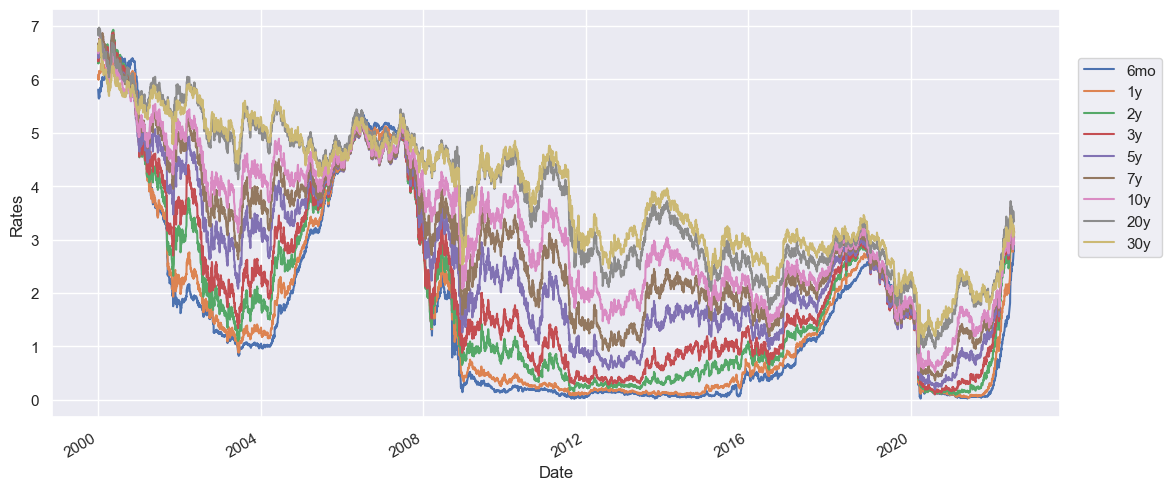

In [88]:
df.plot(figsize=(13,6))
plt.ylabel("Rates")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

In [9]:
df.corr()

,6mo,1y,2y,3y,5y,7y,10y,20y,30y
6mo,1.000000,0.996897,0.979187,0.956754,0.899714,0.843929,0.777785,0.667290,0.616401
1y,0.996897,1.000000,0.990593,0.972811,0.920618,0.866491,0.800931,0.691135,0.638880
2y,0.979187,0.990593,1.000000,0.994450,0.958890,0.914156,0.853595,0.751245,0.699619
3y,0.956754,0.972811,0.994450,1.000000,0.982173,0.948321,0.895895,0.803701,0.754969
5y,0.899714,0.920618,0.958890,0.982173,1.000000,0.990399,0.960228,0.893871,0.855133
7y,0.843929,0.866491,0.914156,0.948321,0.990399,1.000000,0.988272,0.944196,0.914702
10y,0.777785,0.800931,0.853595,0.895895,0.960228,0.988272,1.000000,0.981317,0.962714
20y,0.667290,0.691135,0.751245,0.803701,0.893871,0.944196,0.981317,1.000000,0.992854
30y,0.616401,0.638880,0.699619,0.754969,0.855133,0.914702,0.962714,0.992854,1.000000


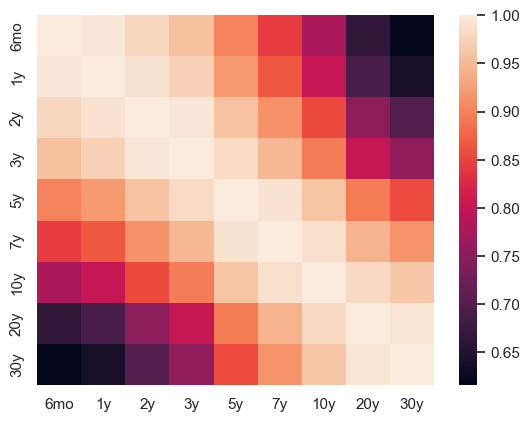

In [10]:
sns.heatmap(df.corr())
plt.show()

In [11]:
df.dtypes

6mo    float64
1y     float64
2y     float64
3y     float64
5y     float64
7y     float64
10y    float64
20y    float64
30y    float64
dtype: object

In [12]:
#Convert to Pandas dataframe if not already
df = pd.DataFrame(df)

In [13]:
df

,6mo,1y,2y,3y,5y,7y,10y,20y,30y
Date,,,,,,,,,
2000-01-03,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55
...,...,...,...,...,...,...,...,...,...
2022-07-11,2.79,2.97,3.07,3.09,3.05,3.06,2.99,3.43,3.18
2022-07-12,2.78,3.07,3.03,3.07,3.01,3.01,2.96,3.37,3.13
2022-07-13,2.96,3.21,3.13,3.14,3.02,3.00,2.91,3.35,3.08


# Start of PCA

In [14]:
import sklearn.decomposition._pca as PCA

In [18]:
pca = PCA.PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.fit(df)

PCA(n_components=9)

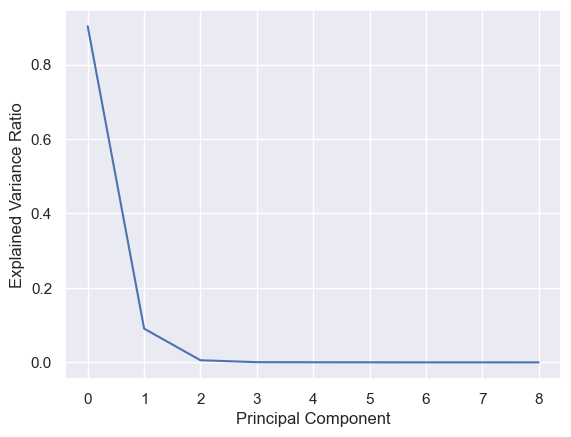

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.show()

In [22]:
pca.n_components

9

In [23]:
loadings = pca.components_
loadings.shape

(9, 9)

In [24]:
loadings[0:9]

array([[ 3.87310316e-01,  3.82808529e-01,  3.79074680e-01,
         3.67343668e-01,  3.40616342e-01,  3.16660733e-01,
         2.88220740e-01,  2.67611539e-01,  2.32010178e-01],
       [-4.12486223e-01, -3.64108848e-01, -2.38483409e-01,
        -1.20310023e-01,  8.76590467e-02,  2.17978619e-01,
         3.28113993e-01,  4.77961826e-01,  4.84382017e-01],
       [-5.34209296e-01, -2.40266488e-01,  2.13913306e-01,
         4.01802817e-01,  4.01913506e-01,  2.76972076e-01,
         6.77532035e-03, -2.49464688e-01, -3.86214324e-01],
       [-4.05944308e-01,  1.35697647e-01,  5.03956094e-01,
         2.74660397e-01, -2.68660954e-01, -4.51759555e-01,
        -2.77276269e-01,  2.31390106e-01,  2.84071073e-01],
       [-2.26700180e-02,  7.97692527e-02, -8.51416329e-03,
        -5.40283641e-02, -9.04366835e-02, -9.17449052e-02,
         1.18028431e-01,  6.97657069e-01, -6.87662245e-01],
       [-3.26658373e-01,  4.27063619e-01,  8.83670268e-02,
        -2.17206766e-01, -1.66739272e-01, -1.450123

In [25]:
#lets get the cumulative proportion of variance explained
PVE=pd.DataFrame({'Principal Component':range(1,pca.n_components+1), 'PVE':pca.explained_variance_ratio_ })
PVE['cumulative_PVE']= np.cumsum(PVE['PVE'])
PVE

,Principal Component,PVE,cumulative_PVE
0,1,0.902519,0.902519
1,2,0.090667,0.993186
2,3,0.005700,0.998886
3,4,0.000564,0.999450
4,5,0.000297,0.999747
5,6,0.000134,0.999882
6,7,0.000064,0.999946
7,8,0.000038,0.999983
8,9,0.000017,1.000000


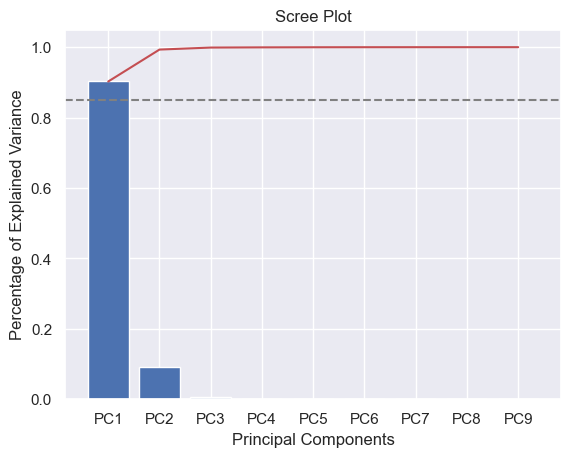

In [26]:
#Looks like the optimal number of Principal components is 2, where we can get over 99% of the variance explained

fig, ax = plt.subplots()
labels = [f'PC{i}' for i in PVE['Principal Component']]

plt.bar(labels, PVE['PVE'])
PVE['cumulative_PVE'].plot(kind='line', color='r')
ax.axhline(0.85, color='grey',linestyle='dashed')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()


# We will compare the result above with those using the fit_transform function

In [74]:
from pca import pca

In [75]:
model = pca(n_components=9,normalize = True)

In [76]:
results = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [77]:
results

{'loadings':           6mo        1y        2y        3y        5y        7y       10y  \
 PC1  0.321116  0.326956  0.337854  0.344720  0.350793  0.348498  0.340390   
 PC2 -0.416878 -0.389426 -0.297852 -0.203571 -0.010286  0.131442  0.271526   
 PC3 -0.535991 -0.290927  0.129613  0.340758  0.421091  0.340883  0.072182   
 PC4  0.413720 -0.065213 -0.496569 -0.358815  0.162137  0.407200  0.363673   
 PC5 -0.047682  0.073092  0.053323 -0.013608 -0.127238 -0.155344  0.073064   
 PC6 -0.296361  0.298379  0.179319 -0.118824 -0.239668 -0.254994  0.757536   
 PC7  0.294468 -0.595805  0.416953  0.112721 -0.535988  0.235282  0.158898   
 PC8  0.288864 -0.397633 -0.207732  0.379449  0.318492 -0.633882  0.260217   
 PC9  0.066251 -0.212337  0.530808 -0.651054  0.459219 -0.181499 -0.027936   
 
           20y       30y  
 PC1  0.319582  0.307413  
 PC2  0.441859  0.507991  
 PC3 -0.197582 -0.396727  
 PC4 -0.130388 -0.328475  
 PC5  0.753027 -0.613715  
 PC6 -0.277528 -0.059331  
 PC7 -0.044109 -0

In [78]:
loadings = results['loadings']

In [79]:
loadingsT = loadings.T
loadingsT

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
6mo,0.321116,-0.416878,-0.535991,0.413720,-0.047682,-0.296361,0.294468,0.288864,0.066251
1y,0.326956,-0.389426,-0.290927,-0.065213,0.073092,0.298379,-0.595805,-0.397633,-0.212337
2y,0.337854,-0.297852,0.129613,-0.496569,0.053323,0.179319,0.416953,-0.207732,0.530808
3y,0.344720,-0.203571,0.340758,-0.358815,-0.013608,-0.118824,0.112721,0.379449,-0.651054
5y,0.350793,-0.010286,0.421091,0.162137,-0.127238,-0.239668,-0.535988,0.318492,0.459219
7y,0.348498,0.131442,0.340883,0.407200,-0.155344,-0.254994,0.235282,-0.633882,-0.181499
10y,0.340390,0.271526,0.072182,0.363673,0.073064,0.757536,0.158898,0.260217,-0.027936
20y,0.319582,0.441859,-0.197582,-0.130388,0.753027,-0.277528,-0.044109,-0.016821,0.016971
30y,0.307413,0.507991,-0.396727,-0.328475,-0.613715,-0.059331,-0.043745,0.008495,-0.001649


In [80]:
pc1 = loadingsT['PC1']
pc2 = loadingsT['PC2']
pc3 = loadingsT['PC3']
maturities = [0.5,1,2,3,5,7,10,20,30]
loadingsT['Maturities (Y)'] = maturities

In [81]:
loadingsT

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Maturities (Y)
6mo,0.321116,-0.416878,-0.535991,0.413720,-0.047682,-0.296361,0.294468,0.288864,0.066251,0.5
1y,0.326956,-0.389426,-0.290927,-0.065213,0.073092,0.298379,-0.595805,-0.397633,-0.212337,1.0
2y,0.337854,-0.297852,0.129613,-0.496569,0.053323,0.179319,0.416953,-0.207732,0.530808,2.0
3y,0.344720,-0.203571,0.340758,-0.358815,-0.013608,-0.118824,0.112721,0.379449,-0.651054,3.0
5y,0.350793,-0.010286,0.421091,0.162137,-0.127238,-0.239668,-0.535988,0.318492,0.459219,5.0
7y,0.348498,0.131442,0.340883,0.407200,-0.155344,-0.254994,0.235282,-0.633882,-0.181499,7.0
10y,0.340390,0.271526,0.072182,0.363673,0.073064,0.757536,0.158898,0.260217,-0.027936,10.0
20y,0.319582,0.441859,-0.197582,-0.130388,0.753027,-0.277528,-0.044109,-0.016821,0.016971,20.0
30y,0.307413,0.507991,-0.396727,-0.328475,-0.613715,-0.059331,-0.043745,0.008495,-0.001649,30.0


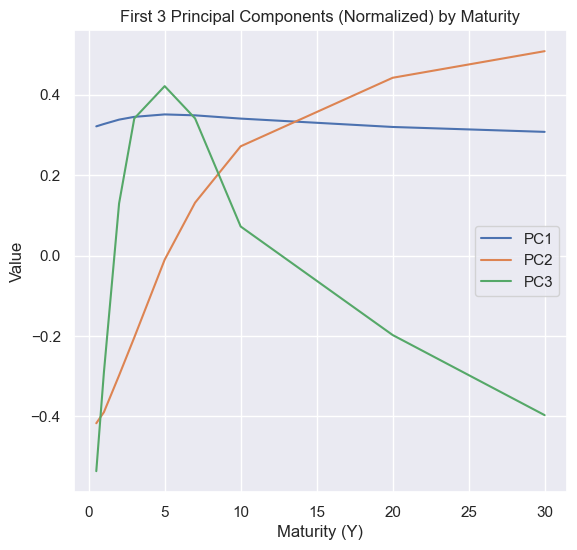

In [88]:
# Plotting the first 3 principal components (scaled) based on maturities
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(loadingsT['Maturities (Y)'], loadingsT['PC1'], label='PC1')
plt.plot(loadingsT['Maturities (Y)'], loadingsT['PC2'], label='PC2')
plt.plot(loadingsT['Maturities (Y)'], loadingsT['PC3'], label='PC3')
plt.title('First 3 Principal Components (Normalized) by Maturity')
plt.xlabel('Maturity (Y)')
plt.ylabel('Value')
plt.legend()

In [83]:
#Set n_components to 0.99, to give us back the PC's that covers this variance
model=pca(n_components=0.99, normalize=True) 

In [84]:
results = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [99.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [99.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


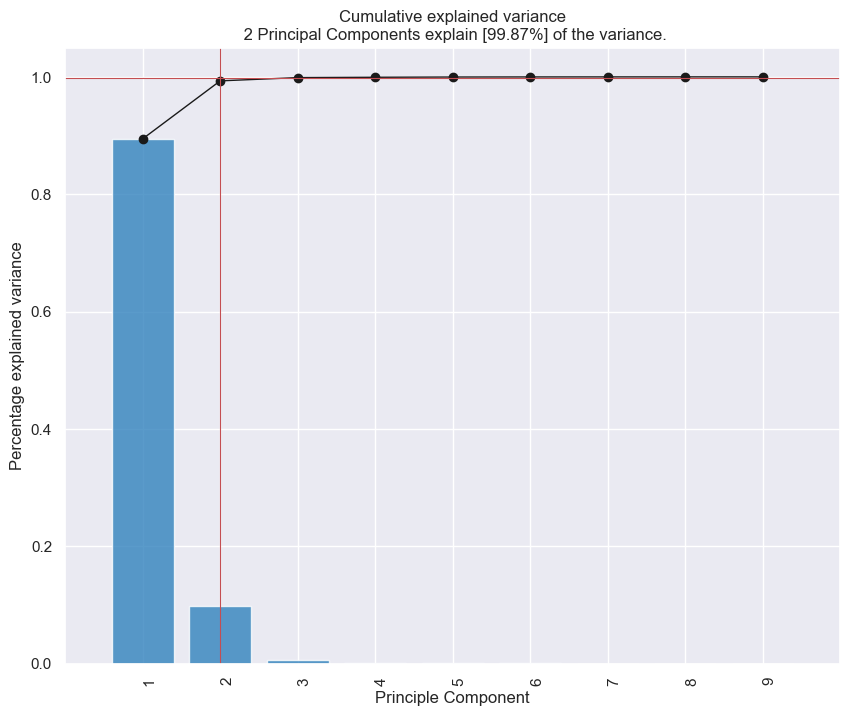

In [85]:
model.plot(figsize=(10,8))
plt.show() #Looks very similar to the scree plot above